In [ ]:
from google.colab import drive
drive.mount('/content/drive',)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow==2.7.0.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 489.6 MB 19 kB/s 
     |████████████████████████████████| 463 kB 54.5 MB/s 
     |████████████████████████████████| 1.3 MB 42.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220

In [ ]:
#imports
import os
import glob
import random
from scipy.io import loadmat
import numpy as np
import cv2

import keras
import tensorflow as tf
from tensorflow.python.keras.layers import (Input,Activation, Conv2D, Dropout, Convolution2D,UpSampling2D)

from tensorflow.keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,Conv2DTranspose,
                  Add,MaxPooling2D,MaxPooling3D, Input, Concatenate,BatchNormalization)
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.losses import mean_absolute_error
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.optimizers import Adam
import os, math
import matplotlib

import matplotlib.pyplot as plt



In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
import os
path = "/content/drive/MyDrive/Valid_RGB.zip (Unzipped Files)/Valid_RGB"
print(os.listdir(path))
for image in os.listdir(path):
   print(image)

['ARAD_1K_0950.jpg', 'ARAD_1K_0901.jpg', 'ARAD_1K_0931.jpg', 'ARAD_1K_0939.jpg', 'ARAD_1K_0909.jpg', 'ARAD_1K_0930.jpg', 'ARAD_1K_0948.jpg', 'ARAD_1K_0942.jpg', 'ARAD_1K_0949.jpg', 'ARAD_1K_0903.jpg', 'ARAD_1K_0913.jpg', 'ARAD_1K_0920.jpg', 'ARAD_1K_0915.jpg', 'ARAD_1K_0907.jpg', 'ARAD_1K_0932.jpg', 'ARAD_1K_0926.jpg', 'ARAD_1K_0945.jpg', 'ARAD_1K_0940.jpg', 'ARAD_1K_0941.jpg', 'ARAD_1K_0918.jpg', 'ARAD_1K_0902.jpg', 'ARAD_1K_0919.jpg', 'ARAD_1K_0937.jpg', 'ARAD_1K_0906.jpg', 'ARAD_1K_0917.jpg', 'ARAD_1K_0911.jpg', 'ARAD_1K_0923.jpg', 'ARAD_1K_0925.jpg', 'ARAD_1K_0943.jpg', 'ARAD_1K_0947.jpg', 'ARAD_1K_0914.jpg', 'ARAD_1K_0946.jpg', 'ARAD_1K_0921.jpg', 'ARAD_1K_0908.jpg', 'ARAD_1K_0934.jpg', 'ARAD_1K_0938.jpg', 'ARAD_1K_0924.jpg', 'ARAD_1K_0910.jpg', 'ARAD_1K_0944.jpg', 'ARAD_1K_0912.jpg', 'ARAD_1K_0904.jpg', 'ARAD_1K_0905.jpg', 'ARAD_1K_0928.jpg', 'ARAD_1K_0922.jpg', 'ARAD_1K_0933.jpg', 'ARAD_1K_0929.jpg', 'ARAD_1K_0936.jpg', 'ARAD_1K_0916.jpg', 'ARAD_1K_0935.jpg', 'ARAD_1K_0927.jpg']

In [ ]:
import os
path1 = "/content/drive/MyDrive/Valid_spectral.zip (Unzipped Files)"
print(os.listdir(path1))
for image in os.listdir(path1):
   print(image) 

['ARAD_1K_0901.mat', 'ARAD_1K_0903.mat', 'ARAD_1K_0902.mat', 'ARAD_1K_0904.mat', 'ARAD_1K_0905.mat', 'ARAD_1K_0906.mat', 'ARAD_1K_0907.mat', 'ARAD_1K_0908.mat', 'ARAD_1K_0909.mat', 'ARAD_1K_0910.mat', 'ARAD_1K_0911.mat', 'ARAD_1K_0912.mat', 'ARAD_1K_0913.mat', 'ARAD_1K_0916.mat', 'ARAD_1K_0914.mat', 'ARAD_1K_0915.mat', 'ARAD_1K_0917.mat', 'ARAD_1K_0918.mat', 'ARAD_1K_0919.mat', 'ARAD_1K_0920.mat', 'ARAD_1K_0921.mat', 'ARAD_1K_0922.mat', 'ARAD_1K_0923.mat', 'ARAD_1K_0924.mat', 'ARAD_1K_0925.mat', 'ARAD_1K_0926.mat', 'ARAD_1K_0927.mat', 'ARAD_1K_0928.mat', 'ARAD_1K_0929.mat', 'ARAD_1K_0930.mat', 'ARAD_1K_0931.mat', 'ARAD_1K_0932.mat', 'ARAD_1K_0933.mat', 'ARAD_1K_0934.mat', 'ARAD_1K_0935.mat', 'ARAD_1K_0936.mat', 'ARAD_1K_0937.mat', 'ARAD_1K_0938.mat', 'ARAD_1K_0939.mat', 'ARAD_1K_0940.mat', 'ARAD_1K_0941.mat', 'ARAD_1K_0942.mat', 'ARAD_1K_0943.mat', 'ARAD_1K_0944.mat', 'ARAD_1K_0945.mat', 'ARAD_1K_0946.mat', 'ARAD_1K_0947.mat', 'ARAD_1K_0948.mat', 'ARAD_1K_0949.mat', 'ARAD_1K_0950.mat']

In [ ]:
!pip install mat73

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
from scipy.io import loadmat
import numpy as np
import mat73

errs=[]
# final_numpyData = np.array(0)
directory=path1
final_numpyData=np.array(0)
for i,pic in enumerate(sorted(os.listdir(directory))):
    if i<50:
        try:
            x=mat73.loadmat(directory+'/'+pic)
        except:
            errs.append(pic)
            continue
        matimg=x['cube']
        final_numpyData=matimg if i==0 else np.stack([final_numpyData,matimg]) if i==1 else np.concatenate([final_numpyData,np.expand_dims(matimg, axis=0)])
        print(i,pic)
    else:
        break
print(final_numpyData.shape)

0 ARAD_1K_0901.mat
1 ARAD_1K_0902.mat
2 ARAD_1K_0903.mat
3 ARAD_1K_0904.mat
4 ARAD_1K_0905.mat
5 ARAD_1K_0906.mat
6 ARAD_1K_0907.mat
7 ARAD_1K_0908.mat
8 ARAD_1K_0909.mat
9 ARAD_1K_0910.mat
10 ARAD_1K_0911.mat
11 ARAD_1K_0912.mat
12 ARAD_1K_0913.mat
13 ARAD_1K_0914.mat
14 ARAD_1K_0915.mat
15 ARAD_1K_0916.mat
16 ARAD_1K_0917.mat
17 ARAD_1K_0918.mat
18 ARAD_1K_0919.mat
19 ARAD_1K_0920.mat
20 ARAD_1K_0921.mat
21 ARAD_1K_0922.mat
22 ARAD_1K_0923.mat
23 ARAD_1K_0924.mat
24 ARAD_1K_0925.mat
25 ARAD_1K_0926.mat
26 ARAD_1K_0927.mat
27 ARAD_1K_0928.mat
28 ARAD_1K_0929.mat
29 ARAD_1K_0930.mat
30 ARAD_1K_0931.mat
31 ARAD_1K_0932.mat
32 ARAD_1K_0933.mat
33 ARAD_1K_0934.mat
34 ARAD_1K_0935.mat
35 ARAD_1K_0936.mat
36 ARAD_1K_0937.mat
37 ARAD_1K_0938.mat
38 ARAD_1K_0939.mat
39 ARAD_1K_0940.mat
40 ARAD_1K_0941.mat
41 ARAD_1K_0942.mat
42 ARAD_1K_0943.mat
43 ARAD_1K_0944.mat
44 ARAD_1K_0945.mat
45 ARAD_1K_0946.mat
46 ARAD_1K_0947.mat
47 ARAD_1K_0948.mat
48 ARAD_1K_0949.mat
49 ARAD_1K_0950.mat
(50, 482, 

In [ ]:
import cv2

rgb_numpyData=np.array(0)
for i,pic in enumerate(sorted(os.listdir(path))):

    if i<50:
        try:
            matimg = cv2.imread(path+"/"+pic)
            print(matimg.shape)
        except Exception as e:
            print("Exception")
            errs.append(pic)
            print(e)
            continue
        rgb_numpyData=matimg if i==0 else np.stack([rgb_numpyData,matimg]) if i==1 else np.concatenate([rgb_numpyData,np.expand_dims(matimg, axis=0)])
        print(i,pic)
    else:
        break
# print("hello")
print(rgb_numpyData.shape)

(482, 512, 3)
0 ARAD_1K_0901.jpg
(482, 512, 3)
1 ARAD_1K_0902.jpg
(482, 512, 3)
2 ARAD_1K_0903.jpg
(482, 512, 3)
3 ARAD_1K_0904.jpg
(482, 512, 3)
4 ARAD_1K_0905.jpg
(482, 512, 3)
5 ARAD_1K_0906.jpg
(482, 512, 3)
6 ARAD_1K_0907.jpg
(482, 512, 3)
7 ARAD_1K_0908.jpg
(482, 512, 3)
8 ARAD_1K_0909.jpg
(482, 512, 3)
9 ARAD_1K_0910.jpg
(482, 512, 3)
10 ARAD_1K_0911.jpg
(482, 512, 3)
11 ARAD_1K_0912.jpg
(482, 512, 3)
12 ARAD_1K_0913.jpg
(482, 512, 3)
13 ARAD_1K_0914.jpg
(482, 512, 3)
14 ARAD_1K_0915.jpg
(482, 512, 3)
15 ARAD_1K_0916.jpg
(482, 512, 3)
16 ARAD_1K_0917.jpg
(482, 512, 3)
17 ARAD_1K_0918.jpg
(482, 512, 3)
18 ARAD_1K_0919.jpg
(482, 512, 3)
19 ARAD_1K_0920.jpg
(482, 512, 3)
20 ARAD_1K_0921.jpg
(482, 512, 3)
21 ARAD_1K_0922.jpg
(482, 512, 3)
22 ARAD_1K_0923.jpg
(482, 512, 3)
23 ARAD_1K_0924.jpg
(482, 512, 3)
24 ARAD_1K_0925.jpg
(482, 512, 3)
25 ARAD_1K_0926.jpg
(482, 512, 3)
26 ARAD_1K_0927.jpg
(482, 512, 3)
27 ARAD_1K_0928.jpg
(482, 512, 3)
28 ARAD_1K_0929.jpg
(482, 512, 3)
29 ARAD_1K

In [ ]:
from sklearn.model_selection import train_test_split
X_data,Y_data=rgb_numpyData,final_numpyData
X_train,  X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size=0.2)		

print("Training data and Ground truth shape.................",X_train.shape,Y_train.shape)
print('Validation Split Completed...........................', X_val.shape, Y_val.shape)

Training data and Ground truth shape................. (40, 482, 512, 3) (40, 482, 512, 31)
Validation Split Completed........................... (10, 482, 512, 3) (10, 482, 512, 31)


In [ ]:
X_data.shape

(50, 482, 512, 3)

In [ ]:
image_size=128

In [ ]:
from skimage import img_as_ubyte
def normalize_data(data):
	# print("Normalizing Data ...........................")
	# print(data.shape, data.dtype, "min:",data.min(), "max:",data.max())
	temp = img_as_ubyte(data)
	# print(temp.shape, temp.dtype, "min:",temp.min(), "max:",temp.max())
	data = temp/temp.max()
	# print(data.shape, data.dtype, "min:",data.min(), "max:",data.max())
	return data	

def resize_npFile(data, image_size, file_save_path=None, save=False):	
#   print("Resizing the input data .................",data.shape)
  resize_np = np.zeros((data.shape[0],image_size, image_size, data.shape[3]))

  for j in range(data.shape[0]):
    for i in range(data.shape[3]):			
      # cv2.imwrite('org.png',img_as_ubyte(data[j][:,:,i]))
      temp = cv2.resize(data[j][:,:,i],(image_size, image_size), interpolation=cv2.INTER_AREA)	
      resize_np[j][:,:,i] = temp
      # print(data[j].shape, data[j][:,:,i].shape, temp.shape, resize_np[j].shape)			
  if save == True:
    np.save(file_save_path, resize_np)
    print('Successfully Saved .....', file_save_path, resize_np.shape)	
  return resize_np

In [ ]:
X_val=normalize_data(X_data)
Y_val=normalize_data(Y_data)

#resize
X_val=resize_npFile(X_val, image_size)
Y_val=resize_npFile(Y_val, image_size)
X_val.shape

(50, 128, 128, 3)

In [ ]:
def old_rgb2hs(image_size):
	model = Sequential()
	model.add(Convolution2D(32, kernel_size=(3, 3),
	                        input_shape=(image_size,image_size,3), padding='same'))
	model.add(Activation('relu'))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	# model.add(Dropout(0.25))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	# model.add(Dropout(0.25))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))
	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))

	model.add(Convolution2D(64, kernel_size=(3, 3),padding='same'))
	model.add(Activation('relu'))

	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(64,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))
	model.add(Conv2DTranspose(31,kernel_size=(3,3),padding='same'))
	model.add(Activation('relu'))

	return model


In [ ]:
model=old_rgb2hs(image_size)

In [ ]:
epochs=10
batch_size=8
lr=0.0001

initial_epoch=0 

model_save_dir="/content/drive/MyDrive/rgb2hsi"
model_name="cnn_normalised_encoder"
version=2

In [ ]:
model.compile(loss='mean_absolute_error', optimizer=Adam(lr=lr), metrics=['mae','mse'])
checkpoint = keras.callbacks.ModelCheckpoint(model_save_dir+'/model_'+str(model_name)+'_'+str(version)+'_{epoch:02d}-{loss:.4f}.h5',monitor='loss',verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq=50)
csv_logger = keras.callbacks.CSVLogger(model_save_dir + "/tr_-v"+str(version)+".csv", separator=',', append=True)
history = model.fit(x=X_val, y=Y_val, batch_size=batch_size, epochs=epochs, verbose=1, initial_epoch=initial_epoch,validation_split=0.2,callbacks=[checkpoint, csv_logger], shuffle=False)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
5/5 [==============================] - 77s 15s/step - loss: 0.1138 - mae: 0.1138 - mse: 0.0320 - val_loss: 0.0647 - val_mae: 0.0647 - val_mse: 0.0127
Epoch 2/10
5/5 [==============================] - 76s 15s/step - loss: 0.1159 - mae: 0.1159 - mse: 0.0342 - val_loss: 0.0700 - val_mae: 0.0700 - val_mse: 0.0122
Epoch 3/10
5/5 [==============================] - 76s 16s/step - loss: 0.1101 - mae: 0.1101 - mse: 0.0307 - val_loss: 0.0682 - val_mae: 0.0682 - val_mse: 0.0119
Epoch 4/10
5/5 [==============================] - 76s 16s/step - loss: 0.1071 - mae: 0.1071 - mse: 0.0303 - val_loss: 0.0619 - val_mae: 0.0619 - val_mse: 0.0110
Epoch 5/10
5/5 [==============================] - 75s 15s/step - loss: 0.1062 - mae: 0.1062 - mse: 0.0299 - val_loss: 0.0642 - val_mae: 0.0642 - val_mse: 0.0110
Epoch 6/10
5/5 [==============================] - 74s 15s/step - loss: 0.1016 - mae: 0.1016 - mse: 0.0277 - val_loss: 0.0601 - val_mae: 0.0601 - val_mse: 0.0098
Epoch 7/10
5/5 [==================

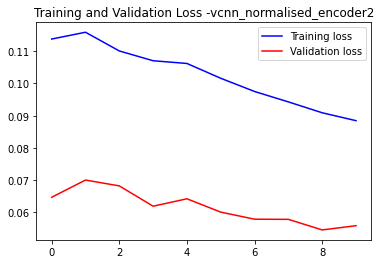

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss -v'+str(model_name)+str(version))
plt.legend()
plt.savefig(os.path.join(model_save_dir, str(model_name)+'_train_loss_'+str(version)+'_'+str(epochs)+'.png')) 
plt.show()

In [ ]:
history.history

{'loss': [0.11379136890172958,
  0.11590354144573212,
  0.11009664833545685,
  0.10705770552158356,
  0.10621120035648346,
  0.10161521285772324,
  0.09751276671886444,
  0.09428022801876068,
  0.09090350568294525,
  0.08845208585262299],
 'mae': [0.11379136890172958,
  0.11590354144573212,
  0.11009664833545685,
  0.10705770552158356,
  0.10621120035648346,
  0.10161521285772324,
  0.09751276671886444,
  0.09428022801876068,
  0.09090350568294525,
  0.08845208585262299],
 'mse': [0.03198392689228058,
  0.034246012568473816,
  0.030664533376693726,
  0.03026605024933815,
  0.02990834042429924,
  0.02772095426917076,
  0.0259582307189703,
  0.024329381063580513,
  0.023044509813189507,
  0.021670415997505188],
 'val_loss': [0.06467212736606598,
  0.07001899182796478,
  0.06820686906576157,
  0.061904776841402054,
  0.06420396268367767,
  0.060065221041440964,
  0.057869862765073776,
  0.05781896039843559,
  0.05454220622777939,
  0.055853478610515594],
 'val_mae': [0.06467212736606598,


In [ ]:
model_json = model.to_json()
with open(model_save_dir+'/model_'+str(model_name)+'_'+str(version)+'_'+str(epochs)+'.json', "w+") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(model_save_dir+'/model_'+str(model_name)+'_'+str(version)+'_'+str(epochs)+'.h5')
print("Saved model to disk")

Saved model to disk


In [ ]:
sample_x,sample_y=X_val[0],Y_val[0]
y_pred=model.predict(np.expand_dims(sample_x,axis=0))
y_pred.shape

(1, 128, 128, 31)

In [ ]:
sample_y.shape

(128, 128, 31)

In [ ]:
rmaee=abs(sample_y-y_pred[0])/sample_y
rmaee.shape

(128, 128, 31)

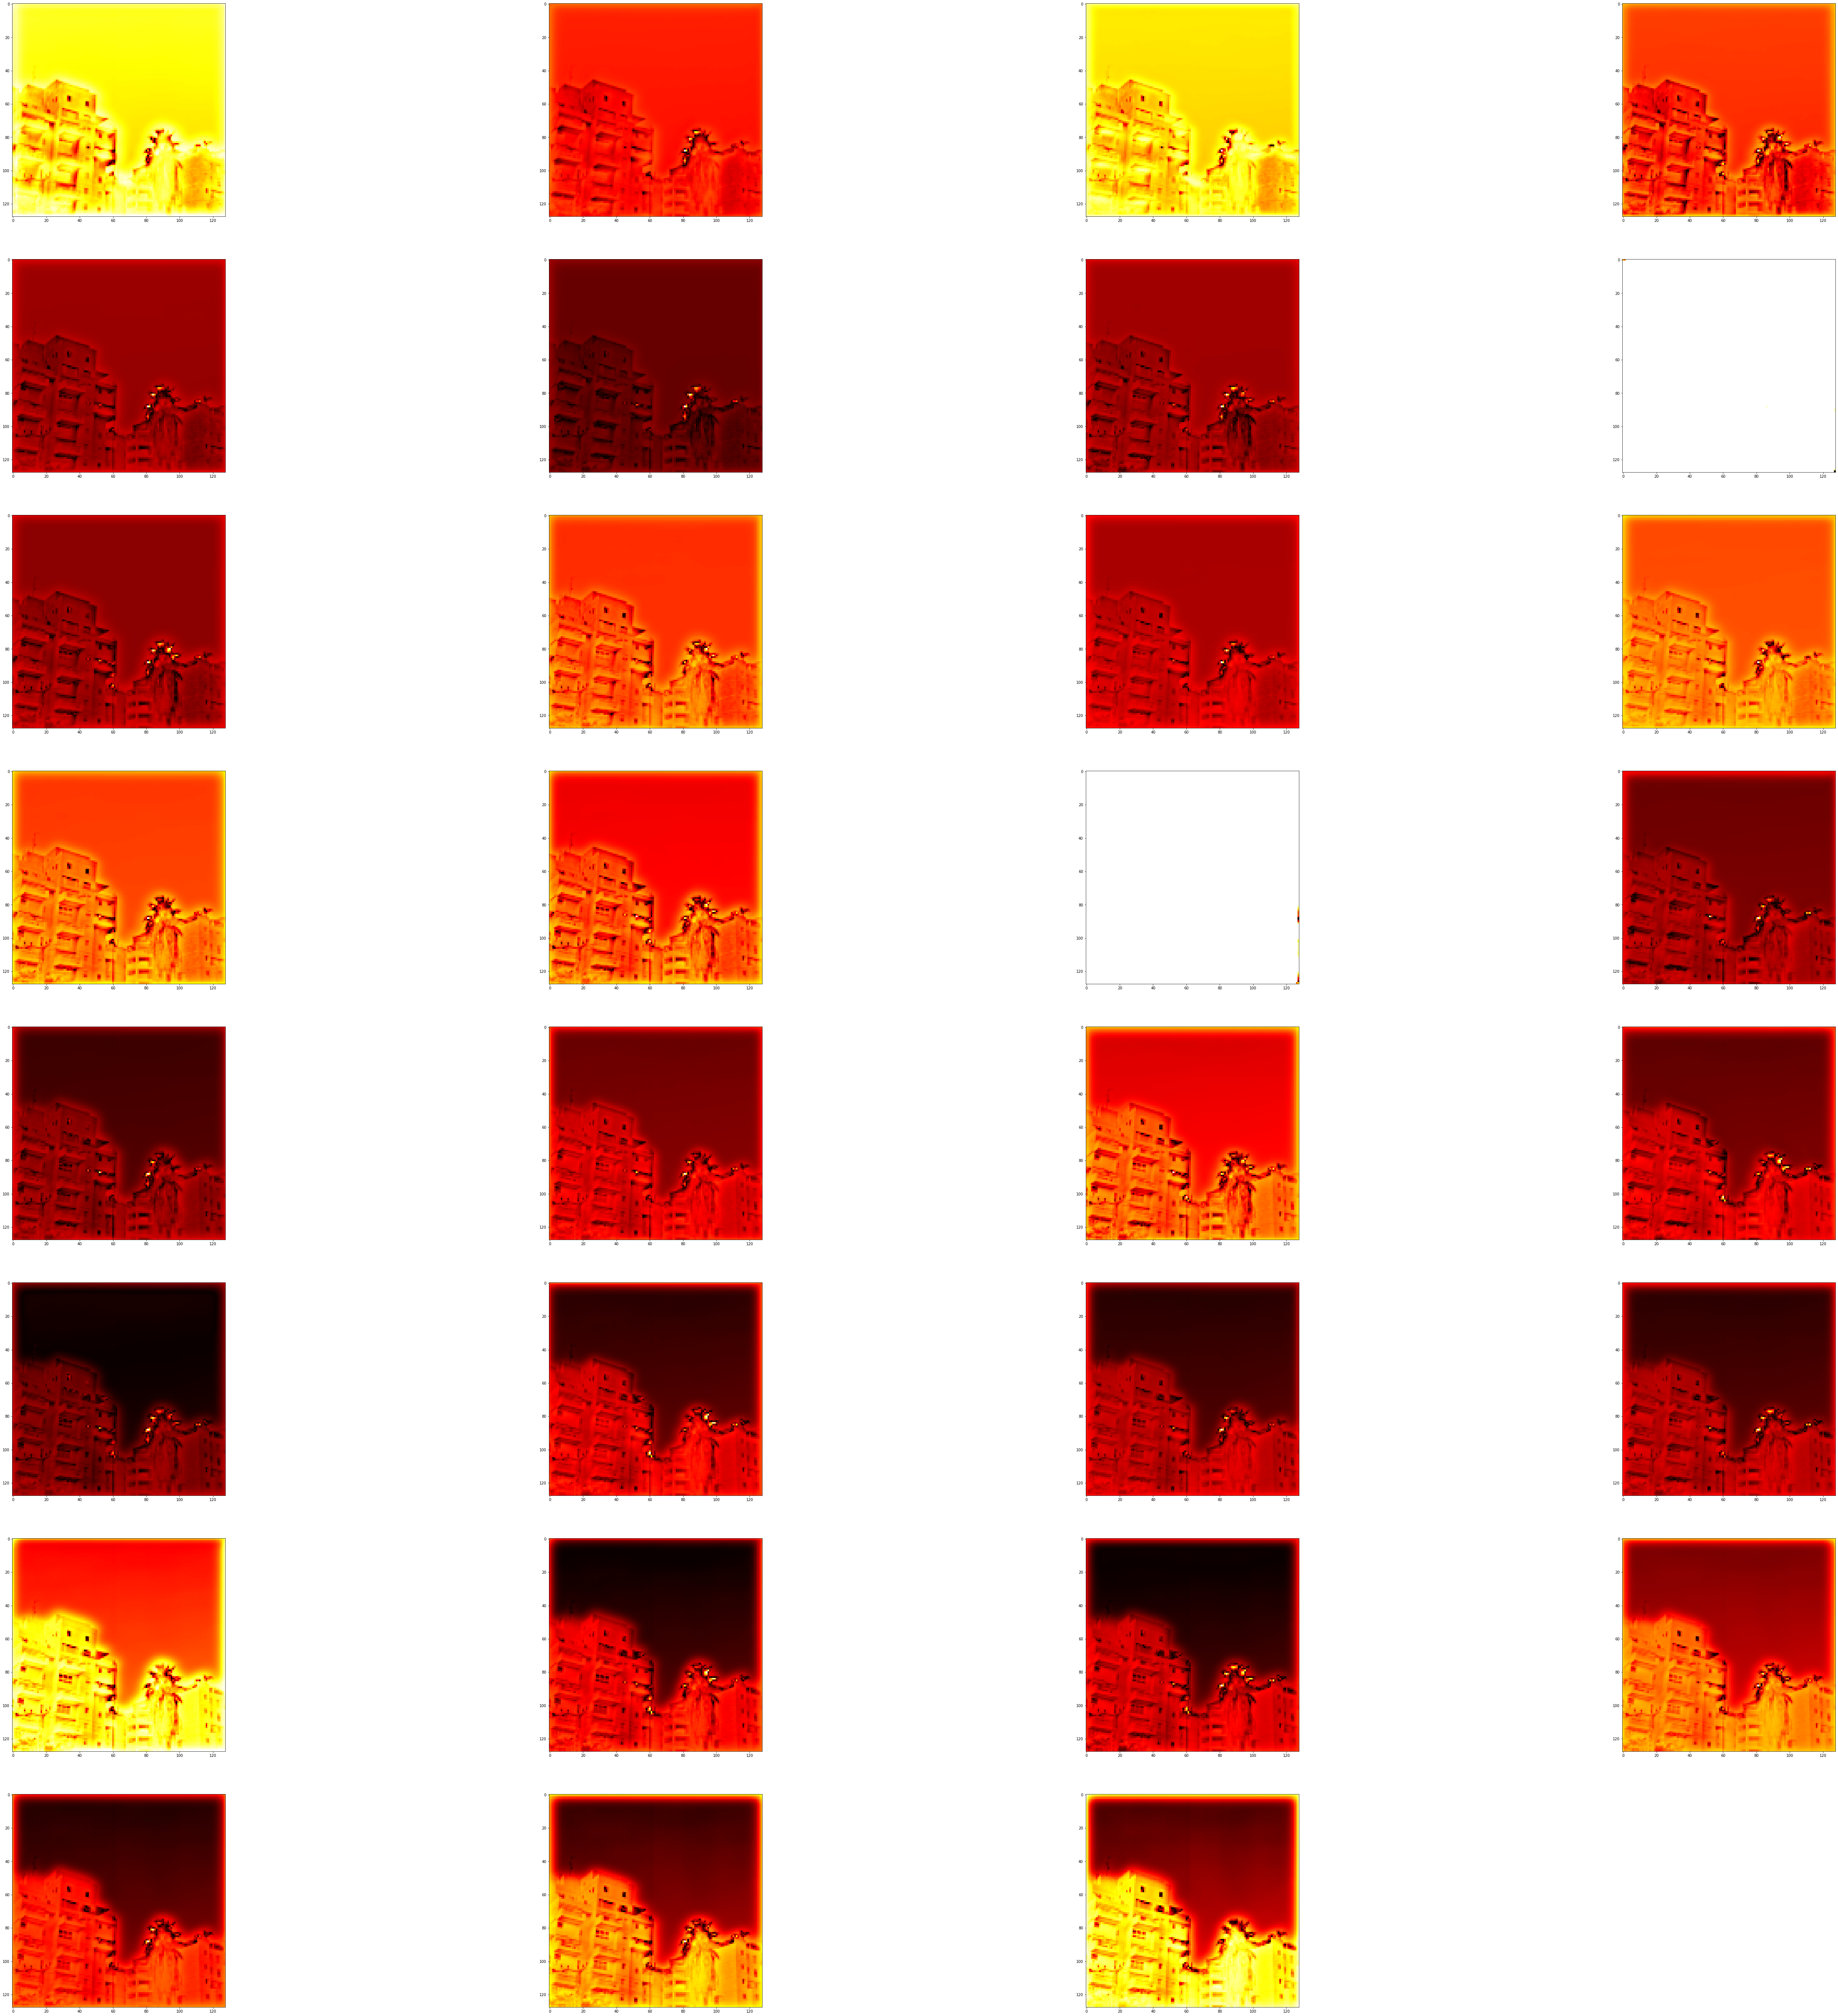

In [ ]:
f=plt.figure(figsize=(100, 100))
for i in range(31):
    plt.subplot(8,4,i+1)
    plt.imshow(rmaee[:,:,i],cmap=plt.get_cmap('hot'), interpolation='nearest')
plt.show()


In [ ]:
np.save(model_save_dir+"/abs_errs.npy", rmaee)

In [ ]:
plt.imsave(model_save_dir+'/test.png', rmaee[0])